In [1]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from copy import deepcopy
import matplotlib.pyplot as plt


In [2]:
# creating input vector and initial weights
x = torch.tensor([1])
z = torch.tensor([1.])

In [3]:
# setting up the network
class Net_1(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
        self.fc1.weight.data.normal_(0,0)
        #self.fc1.weight.data.fill_(0)

    def forward(self, x):
        z_hat = self.fc1(x)
        return z_hat


net = Net_1()
print(net)

Net_1(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)


In [4]:
# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
losses=[]
weights=[]


In [5]:
# training the net
steps = 80


for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    net = net.float()

    z_hat = net(x.float())
    loss = loss_f(z_hat.float(), z.float())
    losses.append(loss)
    loss.backward()
    optimizer.step()
    weights.append(deepcopy(net.fc1.weight))

In [6]:
z_hat1 = net(x.float())
z_hat1

tensor([0.9501], grad_fn=<AddBackward0>)

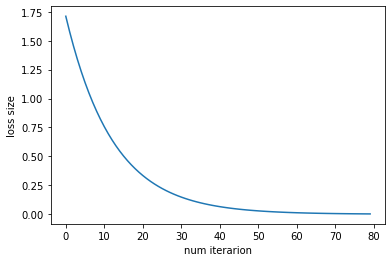

In [7]:
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()

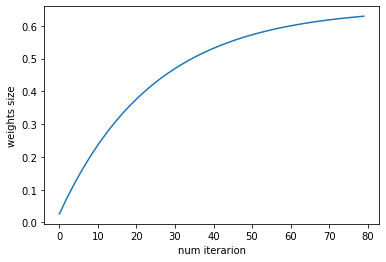

In [8]:
plt.plot(weights)
plt.ylabel('weights size')
plt.xlabel('num iterarion')

plt.show()

# to add : compare to the theortoical



In [9]:
#ex2.2
# creating input vector and initial weights
mu_x=0
sigma_x= 1
n0=100

x_vec = torch.from_numpy(np.random.normal(mu_x, sigma_x, n0))
z = torch.tensor(1)



In [10]:
# setting up the network
class Net(nn.Module):

    def __init__(self, n0):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, 1)
        self.fc1.weight.data.normal_(1, 0.01)

    def forward(self, x):
        z_hat = self.fc1(x)
        return z_hat


net = Net(n0)
print(net)

Net(
  (fc1): Linear(in_features=100, out_features=1, bias=True)
)


In [11]:
# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
losses_2=[]

In [12]:
# training the net
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    net = net.float()
    z_hat = net(x_vec.float())
    loss = loss_f(z_hat.float(), z.float())
    losses_2.append(loss)
    loss.backward()
    optimizer.step()

c:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [13]:
z_hat = net(x_vec.float())
z_hat

tensor([-103.6329], grad_fn=<AddBackward0>)

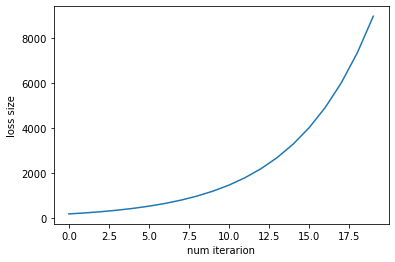

In [14]:
plt.plot(losses_2)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()

In [15]:
#ex2.3
# creating input vector and initial weights
mu_x=0
sigma_x= 1
n0=100
n1=200

# x_vec = torch.from_numpy(np.random.normal(mu_x, sigma_x, n0))
x_vec = torch.randn(n0)
z = torch.tensor(1.)

In [16]:
# setting up the network
class Net(nn.Module):

    def __init__(self, n0, n1):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, n1, bias=False)
        self.fc1.weight.data.normal_(0, 0.01)
        self.fc2 = nn.Linear(n1, 1, bias=False)
        self.fc2.weight.data.normal_(0, 0.05)


    def forward(self, x):
        x = self.fc1(x)
        z_hat = self.fc2(x)
        return z_hat


net = Net(n0, n1)
state_dict_init = deepcopy(net.state_dict())
w1_init = net.fc1.weight.clone()
w2_init = net.fc2.weight.clone()

print(net)

Net(
  (fc1): Linear(in_features=100, out_features=200, bias=False)
  (fc2): Linear(in_features=200, out_features=1, bias=False)
)


In [17]:
# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
losses=[]



In [18]:
# training the net
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    # net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat, z)
    loss.backward()
    losses.append(loss)
    optimizer.step()

c:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [19]:
z_hat = net(x_vec.float())
z_hat

tensor([1.], grad_fn=<SqueezeBackward3>)

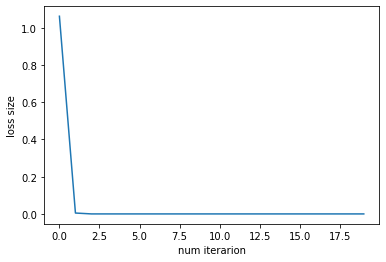

In [20]:
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()

In [21]:
# Ex3
# w1- init w2-final
with torch.no_grad():
  w1_final=net.fc1.weight.clone()
  w2_final=net.fc2.weight.clone()

  net.fc1.weight[:] = w1_init
  z_hat_0 = net(x_vec.float())
  loss_0 = loss_f(z_hat_0.float(), z.float())
  print(f"z_hat_0: {z_hat_0[0]:.3f}, loss_0: {loss_0:.3f}")


z_hat_0: 0.013, loss_0: 0.973


c:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [22]:
# w1- final w2-init
with torch.no_grad():
  net.fc1.weight[:] = w1_final
  net.fc2.weight[:]=w2_init
  z_hat_0 = net(x_vec.float())
  loss_0 = loss_f(z_hat_0.float(), z.float())
  print(f"z_hat_0: {z_hat_0[0]:.3f}, loss_0: {loss_0:.3f}")

z_hat_0: 0.955, loss_0: 0.002


c:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


c:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


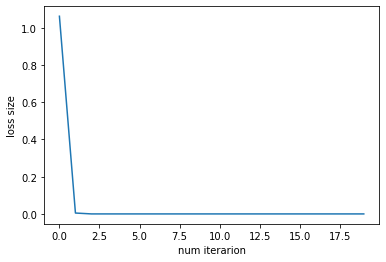

In [23]:
# freeze w1, train w2
with torch.no_grad():
    net.fc1.weight[:] = w1_init
# training the net
losses=[]
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    # net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat, z)
    loss.backward()
    losses.append(loss)
    optimizer.step()

z_hat = net(x_vec.float())
z_hat
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()



c:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


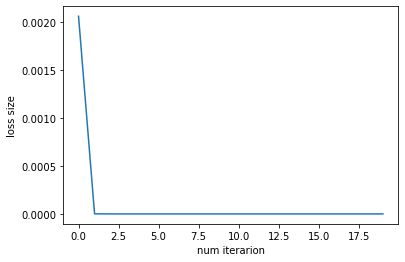

In [24]:
# freeze w2, train w1
with torch.no_grad():
    net.fc2.weight[:] = w2_init
# training the net
losses=[]
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    # net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat, z)
    loss.backward()
    losses.append(loss)
    optimizer.step()

z_hat = net(x_vec.float())
z_hat
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()